In [122]:
import numpy as np
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [123]:
day_n1 = pd.read_csv('./round-3-island-data-bottle/prices_round_3_day_0.csv', sep=';')
day_0 = pd.read_csv('./round-3-island-data-bottle/prices_round_3_day_1.csv', sep=';')
day_1 = pd.read_csv('./round-3-island-data-bottle/prices_round_3_day_2.csv', sep=';')


In [124]:
day_n1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,999800,GIFT_BASKET,71131,19,71130.0,21.0,NaN,NaN,71145,19,71146.0,21.0,NaN,NaN,71138.0,0.0
39996,0,999900,CHOCOLATE,7987,124,NaN,NaN,NaN,NaN,7989,124,NaN,NaN,NaN,NaN,7988.0,0.0
39997,0,999900,GIFT_BASKET,71117,2,71116.0,16.0,71115.0,18.0,71128,2,71130.0,16.0,71131.0,18.0,71122.5,0.0
39998,0,999900,ROSES,14550,18,14549.0,46.0,NaN,NaN,14551,64,NaN,NaN,NaN,NaN,14550.5,0.0


In [125]:
CHOCOLATE_day_n1 = day_n1[day_n1['product']=='CHOCOLATE'].reset_index(drop=True)
CHOCOLATE_day_0 = day_0[day_0['product']=='CHOCOLATE'].reset_index(drop=True)
CHOCOLATE_day_n2 = day_1[day_1['product']=='CHOCOLATE'].reset_index(drop=True)

CHOCOLATE_day_n1['log_mid'] = np.log(CHOCOLATE_day_n1['mid_price'] / CHOCOLATE_day_n1['mid_price'].shift(1))
CHOCOLATE_day_0['log_mid'] = np.log(CHOCOLATE_day_0['mid_price'] / CHOCOLATE_day_0['mid_price'].shift(1))
CHOCOLATE_day_n2['log_mid'] = np.log(CHOCOLATE_day_n2['mid_price'] / CHOCOLATE_day_n2['mid_price'].shift(1))

STRAWBERRIES_day_n1 = day_n1[day_n1['product']=='STRAWBERRIES'].reset_index(drop=True)
STRAWBERRIES_day_0 = day_0[day_0['product']=='STRAWBERRIES'].reset_index(drop=True)
STRAWBERRIES_day_n2 = day_1[day_1['product']=='STRAWBERRIES'].reset_index(drop=True)

ROSES_day_n1 = day_n1[day_n1['product']=='ROSES'].reset_index(drop=True)
ROSES_day_0 = day_0[day_0['product']=='ROSES'].reset_index(drop=True)
ROSES_day_n2 = day_1[day_1['product']=='ROSES'].reset_index(drop=True)

GIFT_BASKET_day_n1 = day_n1[day_n1['product']=='GIFT_BASKET'].reset_index(drop=True)
GIFT_BASKET_day_0 = day_0[day_0['product']=='GIFT_BASKET'].reset_index(drop=True)
GIFT_BASKET_day_n2 = day_1[day_1['product']=='GIFT_BASKET'].reset_index(drop=True)

In [127]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, LinearRegression
import statsmodels.api as sm


ridge_alphas = []
ridge_coefs = []
ridge_inters = []
models = []
for df in [CHOCOLATE_day_n2, CHOCOLATE_day_n1, CHOCOLATE_day_0]:
    # Define the number of previous timepoints to consider
    k = 40

    # Create a new dataframe to store the lagged values
    lagged_df = pd.DataFrame()

    # Create lagged columns for mid_price
    for i in range(1, k+1):
        lagged_df[f'log_mid_lag{i}'] = df['log_mid'].shift(i)

    # Drop rows with NaN values
    # lagged_df = lagged_df.dropna()

    # Define the independent variables
    # X = lagged_df.drop('log_mid', axis=1)
    X = lagged_df.loc[k+1:]

    # X = sm.add_constant(X)

    # Define the dependent variable
    y = df['log_mid'].loc[k+1:]

    # Perform cross-validation for ridge regression
    alphas = np.array([0.0001, 0.0005, 0.0008, 0.001, 0.005, 0.01, 0.1, 0.5, 1, 2, 5])
                       #1.0, 10.0, 30.0,50.0, 70.0, 90.0, 100.0, 120.0, 140.0, 180.0])
    # ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
    # model = sm.OLS(y, X)
    # results = model.fit_regularized(alpha=0.5, L1_wt=0, refit=True, method='elastic_net', maxiter=100)
    # ridge_cv.fit(X, y)

    model = LinearRegression()

    # Train the model
    model.fit(X, y)
    models.append(model)
    # print("Best Alpha:", ridge_cv.alpha_)
    # print("Coefficients:", ridge_cv.coef_)

    # # Optionally, print the intercept
    # print("Intercept:", ridge_cv.intercept_)

    # ridge_alphas.append(ridge_cv.alpha_)
    # ridge_coefs.append(ridge_cv.coef_)
    # ridge_inters.append(ridge_cv.intercept_)

    # Print the coefficients
    # print('Intercept:', results.params[0])
    # print('Coefficients:', results.params[1:])


In [128]:
avg_alpha = sum(ridge_alphas)/len(ridge_alphas)
avg_inter = sum(ridge_inters)/len(ridge_inters)
avg_coef = sum(ridge_coefs)/len(ridge_coefs)
avg_coef = np.insert(avg_coef, 0, 0)

ZeroDivisionError: division by zero

In [130]:
average_coefficients = np.mean([model.coef_ for model in models], axis=0)
average_coefficients

array([-0.01683764,  0.00289802,  0.00726374,  0.00195943,  0.00051231,
       -0.00932831,  0.00357109,  0.00596899, -0.00252058, -0.00863933,
       -0.00408616,  0.00010893, -0.00106164, -0.00811947,  0.00274575,
        0.00285398,  0.001962  , -0.00396208, -0.0066291 , -0.00831233,
       -0.00249731, -0.0022709 ,  0.00345512, -0.00438753,  0.01003413,
        0.00043879, -0.00320134, -0.0048109 ,  0.00343407, -0.00088977,
        0.00792939,  0.00503882,  0.00077813, -0.01187831, -0.00662867,
       -0.00989628, -0.00817108,  0.0004667 , -0.0030745 , -0.00661826])

In [131]:
# a = np.array([0,0,1])
# base_ar = np.array([0,3, 1, 2])
# np.convolve(a, base_ar, mode='valid')

lagged_df = pd.DataFrame()

# Create lagged columns for mid_price
for i in range(1, k+1):
    lagged_df[f'log_mid_lag{i}'] = CHOCOLATE_day_0['log_mid'].shift(i)

# Drop rows with NaN values
# lagged_df = lagged_df.dropna()

# Define the independent variables
# X = lagged_df.drop('log_mid', axis=1)
X = lagged_df.loc[k+1:]


In [134]:
y_pred = np.dot(X, average_coefficients)

In [137]:
# Compare prediction with actual
data_df = CHOCOLATE_day_n2
# for i in range(1, 41):
#     data_df[f'mid_price_lag{i}'] = data_df['mid_price'].shift(i)

# kernel = avg_coef
# kernel = ridge_coefs[0]
# data_df['predicted_price'] = np.pad(np.convolve(df['log_mid'], kernel, mode='valid'),(len(kernel)-1, 0), mode='constant', constant_values=(np.nan, 0))
# data_df['predicted_price'] = data_df['predicted_price'] + avg_inter

data_df['predicted_price'] = np.pad(y_pred, (len(kernel)+1, 0),mode='constant', constant_values=(np.nan, 0))

In [139]:
data_df['predicted_price']

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
9995   -2.701045e-06
9996   -5.405208e-06
9997   -5.044122e-06
9998   -9.041473e-07
9999   -2.183715e-06
Name: predicted_price, Length: 10000, dtype: float64

In [140]:
correlation = data_df['predicted_price'].corr(data_df['log_mid'])
print(correlation)


0.009471735815682135


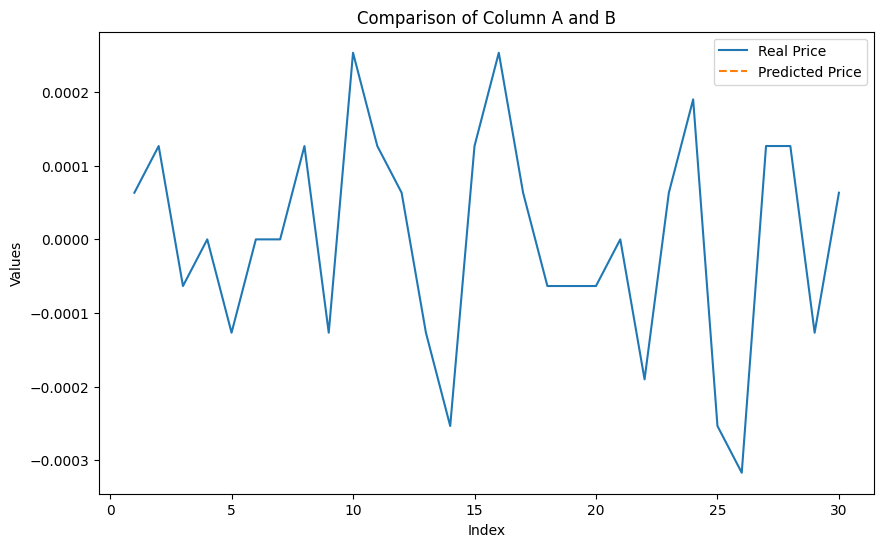

In [146]:
import matplotlib.pyplot as plt

# Plotting with matplotlib for more control
plt.figure(figsize=(10, 6))
plt.plot(data_df.loc[:30].index, data_df['log_mid'].loc[:30], label='Real Price')
plt.plot(data_df.loc[:30].index, data_df['predicted_price'].loc[:30]*10, label='Predicted Price', linestyle='--')
plt.title('Comparison of Column A and B')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

In [19]:
# Compute percent decrease from humidity
def compute_from_humidity(x):
    if x >= 60 and x <= 80:
        return 1
    if x < 60:
        return 1 - (60 - x) / 5 * 0.02
    if x > 80:
        return 1 - (x - 80) / 5 * 0.02

day_n1['ORCHID_PHUMIDITY'] = day_n1['HUMIDITY'].apply(compute_from_humidity)
day_0['ORCHID_PHUMIDITY'] = day_0['HUMIDITY'].apply(compute_from_humidity)
day_1['ORCHID_PHUMIDITY'] = day_1['HUMIDITY'].apply(compute_from_humidity)

# Compute percent decrease from sunlight
def compute_from_sunlight(x):
    if x >= 3600:
        return 1
    else:
        return 1 - (3600 - x) / 72 * 0.04

day_n1['ORCHID_PSUNLIGHT'] = day_n1['SUNLIGHT'].apply(compute_from_sunlight)
day_0['ORCHID_PSUNLIGHT'] = day_0['SUNLIGHT'].apply(compute_from_sunlight)
day_1['ORCHID_PSUNLIGHT'] = day_1['SUNLIGHT'].apply(compute_from_sunlight)



KeyboardInterrupt



In [ ]:
# Apply log transformation
day_n1['ORCHIDS_log_return'] = np.log(day_n1['ORCHIDS'] / day_n1['ORCHIDS'].shift(1))
day_n1['SUNLIGHT_log_return'] = np.log(day_n1['SUNLIGHT'] / day_n1['SUNLIGHT'].shift(1))
day_n1['HUMIDITY_log_return'] = np.log(day_n1['HUMIDITY'] / day_n1['HUMIDITY'].shift(1))
day_n1['ORCHID_PHUMIDITY_log_return'] = np.log(day_n1['ORCHID_PHUMIDITY'] / day_n1['ORCHID_PHUMIDITY'].shift(1))
day_n1['ORCHID_PSUNLIGHT_log_return'] = np.log(day_n1['ORCHID_PSUNLIGHT'] / day_n1['ORCHID_PSUNLIGHT'].shift(1))

day_0['ORCHIDS_log_return'] = np.log(day_0['ORCHIDS'] / day_0['ORCHIDS'].shift(1))
day_0['SUNLIGHT_log_return'] = np.log(day_0['SUNLIGHT'] / day_0['SUNLIGHT'].shift(1))
day_0['HUMIDITY_log_return'] = np.log(day_0['HUMIDITY'] / day_0['HUMIDITY'].shift(1))
day_0['ORCHID_PHUMIDITY_log_return'] = np.log(day_0['ORCHID_PHUMIDITY'] / day_0['ORCHID_PHUMIDITY'].shift(1))
day_0['ORCHID_PSUNLIGHT_log_return'] = np.log(day_0['ORCHID_PSUNLIGHT'] / day_0['ORCHID_PSUNLIGHT'].shift(1))

day_1['ORCHIDS_log_return'] = np.log(day_1['ORCHIDS'] / day_1['ORCHIDS'].shift(1))
day_1['SUNLIGHT_log_return'] = np.log(day_1['SUNLIGHT'] / day_1['SUNLIGHT'].shift(1))
day_1['HUMIDITY_log_return'] = np.log(day_1['HUMIDITY'] / day_1['HUMIDITY'].shift(1))
day_1['ORCHID_PHUMIDITY_log_return'] = np.log(day_1['ORCHID_PHUMIDITY'] / day_1['ORCHID_PHUMIDITY'].shift(1))
day_1['ORCHID_PSUNLIGHT_log_return'] = np.log(day_1['ORCHID_PSUNLIGHT'] / day_1['ORCHID_PSUNLIGHT'].shift(1))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
day_n1.head()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,ORCHIDS_log_return,SUNLIGHT_log_return,HUMIDITY_log_return,ORCHID_PSUNLIGHT,ORCHID_PHUMIDITY,ORCHID_PHUMIDITY_log_return,ORCHID_PSUNLIGHT_log_return
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1,NaN,NaN,NaN,0.388889,1.0,NaN,NaN
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1,0.001457,-0.000232,0.000052,0.388566,1.0,0.0,-0.000829
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1,0.000000,-0.000230,0.000052,0.388248,1.0,0.0,-0.000821
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1,0.000000,-0.000227,0.000052,0.387932,1.0,0.0,-0.000813
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1,0.000000,-0.000225,0.000053,0.387620,1.0,0.0,-0.000804


<AxesSubplot:xlabel='delay of orchids', ylabel='correlation coefficient'>

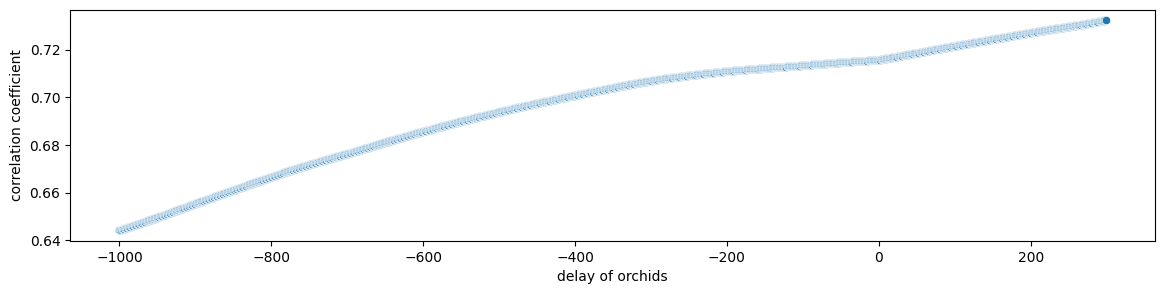

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))


# crosscorr_matrix = np.zeros([4,4])
# crossindex_matrix = np.zeros([4,4]) 
# for i in range(4):
#     for j in range(4):
#         d1 = normalized_df[f'Stock{i+1}r']
#         d2 = normalized_df[f'Stock{j+1}r']
#         arr = np.array([[lag,crosscorr(d1,d2, lag)] for lag in range(-300,300)]).transpose()
#         crosscorr_matrix[i][j] = max(arr[1],key=abs)
#         crossindex_matrix[i][j] = arr[0][int(np.argmax(np.abs(arr[1])))]

# Join columns from day_n1, day_0, and day_1
joined_df = pd.concat([day_n1, day_0, day_1], ignore_index=True)

d1 = joined_df['SUNLIGHT']
d2 = joined_df['ORCHIDS']
rs = np.array([[lag, crosscorr(d1,d2, lag)] for lag in range(-1000,300)])
        
rs_df = pd.DataFrame(rs,columns=['delay of orchids','correlation coefficient'])
f,ax=plt.subplots(figsize=(14,3))
seaborn.scatterplot(data=rs_df,x='delay of orchids',y='correlation coefficient')
# ax.axvline(rs_df["index"][np.argmax(rs_df["value"])],color='r',linestyle='--',label='Peak synchrony')
# ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-1,1],xlim=[-800,800], xlabel='Offset',ylabel='Pearson r')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

In [ ]:
argmax_index = rs_df['correlation coefficient'].idxmax()
delay_of_orchids = rs_df['delay of orchids'].loc[argmax_index]
print(argmax_index)
print(delay_of_orchids)


1299
299.0


<AxesSubplot:xlabel='HUMIDITY_log_return', ylabel='ORCHIDS_log_return'>

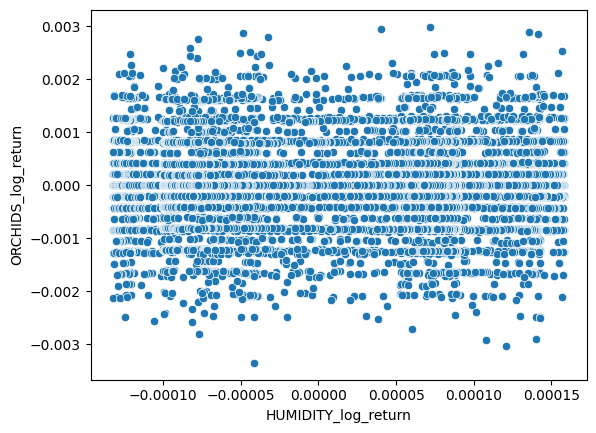

In [ ]:
import seaborn as sns

sns.scatterplot(data=day_n1, x='HUMIDITY_log_return', y='ORCHIDS_log_return')
# Plot ORCHID_PHUMIDITY vs HUMIDITY with seaborn


In [ ]:
#indices of best elements
# print(rs_df['correlation coefficient'][np.abs(rs_df['correlation coefficient']) > 0.65].index)
# print(rs_df['correlation coefficient'][np.abs(rs_df['correlation coefficient']) > 0.65].index)
print(rs_df['correlation coefficient'].idxmax())
print(rs_df['delay of orchids'].loc[93])

1299
-907.0


In [ ]:
sunlight_shift = 1  #207

day_n1['TRANSPORT_FEES_shifted'] = day_n1['TRANSPORT_FEES'].shift(337)
day_n1['EXPORT_TARIFF_shifted'] = day_n1['EXPORT_TARIFF'].shift(772)
day_n1['IMPORT_TARIFF_shifted'] = day_n1['IMPORT_TARIFF'].shift(1)
day_n1['SUNLIGHT_shifted'] = day_n1['SUNLIGHT'].shift(sunlight_shift)
day_n1['HUMIDITY_shifted'] = day_n1['HUMIDITY'].shift(229)

day_0['TRANSPORT_FEES_shifted'] = day_0['TRANSPORT_FEES'].shift(337)
day_0['EXPORT_TARIFF_shifted'] = day_0['EXPORT_TARIFF'].shift(772)
day_0['IMPORT_TARIFF_shifted'] = day_0['IMPORT_TARIFF'].shift(1)
day_0['SUNLIGHT_shifted'] = day_0['SUNLIGHT'].shift(sunlight_shift)
day_0['HUMIDITY_shifted'] = day_0['HUMIDITY'].shift(229)

day_1['TRANSPORT_FEES_shifted'] = day_1['TRANSPORT_FEES'].shift(337)
day_1['EXPORT_TARIFF_shifted'] = day_1['EXPORT_TARIFF'].shift(772)
day_1['IMPORT_TARIFF_shifted'] = day_1['IMPORT_TARIFF'].shift(1)
day_1['SUNLIGHT_shifted'] = day_1['SUNLIGHT'].shift(sunlight_shift)
day_1['HUMIDITY_shifted'] = day_1['HUMIDITY'].shift(229)


<AxesSubplot:xlabel='SUNLIGHT_shifted', ylabel='ORCHIDS'>

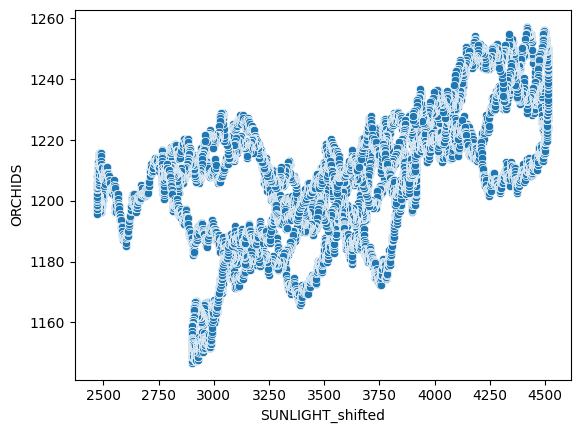

In [ ]:
sns.scatterplot(data=day_n1, x='SUNLIGHT_shifted', y='ORCHIDS')
# Plot ORCHID_PHUMIDITY vs HUMIDITY with seaborn


In [ ]:
correlation = day_n1['SUNLIGHT_shifted'].corr(day_n1['ORCHIDS'])
print(correlation)


0.632773922574401


In [ ]:
import statsmodels.api as sm
# Define the independent variables
# X = day_n1[['TRANSPORT_FEES_shifted', 'EXPORT_TARIFF_shifted', 'IMPORT_TARIFF_shifted', 'SUNLIGHT_shifted', 'HUMIDITY_shifted']]
X = day_1[['HUMIDITY_shifted']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = day_1['ORCHIDS']

# Drop rows with NaN values
data = pd.concat([X, y], axis=1).dropna()

# Separate the independent variables and dependent variable
X = data.drop('ORCHIDS', axis=1)
y = data['ORCHIDS']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                ORCHIDS   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     7092.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:43:35   Log-Likelihood:                -44102.
No. Observations:                9772   AIC:                         8.821e+04
Df Residuals:                    9770   BIC:                         8.822e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              876.8704      2.186  